#### **Regression-Analysis-Team-Project** by Team 1

### [Kaggle competition] 
# Zillow Prize: Zillow’s Home Value Prediction (Zestimate)
### Can you improve the algorithm that changed the world of real estate?

## **1. Data Introduce**

### 1.1 Purpose
- Target: log-error
    - log-error between their Zestimate(house price estimation) and the actual sale price
    - calculation: $logerror=log(Zestimate)−log(SalePrice)$
- Feature: all given features of a home 
- 모든 properties에 대해 2016년 10월, 11월, 12월 & 2017년 10월, 11월, 12월 6개 시점의 logerror를 예측

### 1.2 Data set:
- a full list of real estate properties in three counties (Los Angeles, Orange and Ventura, California)
- Properties data
    - properties_2016.csv - all the properties with their home features for 2016
    - properties_2017.csv - all the properties with their home features for 2017
- Train data: 거래된 집에 대한 데이터
    - parcelid, transaction date, logerror 3개 column으로 이루어짐
    - train_2016.csv - the training set with transactions from 1/1/2016 to 12/31/2016
    - train_2017.csv - the training set with transactions from 1/1/2017 to 9/15/2017    

## **2. EDA - Exploring the Data!**

#### Importing necessary libraries

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn as sk
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 657, in launch_instance
    app.initialize(argv)
  File "<decorator-gen-124>", line 2, in initialize
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py"

In [2]:
%matplotlib inline   

# ignore warning messeges
import warnings
warnings.filterwarnings('ignore')
import xlrd
import openpyxl

import time
from patsy import dmatrix

#### Importing Data

##### (1) Properties Data

In [254]:
prop16 = pd.read_csv('data/properties_2016.csv')

In [255]:
prop17 = pd.read_csv('data/properties_2017.csv')

##### (2) Train Data

In [256]:
train16 = pd.read_csv('data/train_2016_v2.csv', parse_dates=["transactiondate"])

In [257]:
train17 = pd.read_csv('data/train_2017.csv', parse_dates=["transactiondate"])

### 2.1 Data Shape 

#### (1) Properties Data

In [258]:
prop16.tail()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
2985212,168176230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985213,14273630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985214,168040630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985215,168040830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985216,168040430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [259]:
prop17.tail()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
2985212,12170430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985213,11422430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985214,17203030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985215,14242830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985216,12766630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [260]:
print("shape of prop16: ", prop16.shape)
print("shape of prop17: ", prop17.shape)

shape of prop16:  (2985217, 58)
shape of prop17:  (2985217, 58)


In [261]:
# prop16과 prop17의 parcelid를 합쳤을 때 개수를 확인 (join="inner": 두 column에 다 있는 경우 결합)
id16 = prop16["parcelid"].rename(columns={"parcelid":"2016"})
id17 = prop16["parcelid"].rename(columns={"parcelid":"2017"})
id = pd.concat([id16, id17], axis=1, join='inner') 
print("shape of id: ", id.shape)
id[0][id[0]!=id[1]]    # 2016과 2017이 다를 때로 filtering

shape of id:  (2985217, 2)


Series([], Name: 0, dtype: int64)

##### Comment:
- Propertie data는 2016년과 2017년 모두 (2985217 * 58)로 shape이 동일함 (2985217개의 집에 대한 58개 특징 변수)
- 2016년과 2017년 data의 parcelid는 완전히 동일함, 즉 두 데이터는 같은 집들에 대한 2개 년도의 집의 특징에 대한 자료임

#### (2) Train Data

In [262]:
train16.tail()

,parcelid,logerror,transactiondate
90270,10774160,-0.0356,2016-12-30
90271,12046695,0.0070,2016-12-30
90272,12995401,-0.2679,2016-12-30
90273,11402105,0.0602,2016-12-30
90274,12566293,0.4207,2016-12-30


In [263]:
train17.tail()

,parcelid,logerror,transactiondate
77608,10833991,-0.002245,2017-09-20
77609,11000655,0.020615,2017-09-20
77610,17239384,0.013209,2017-09-21
77611,12773139,0.037129,2017-09-21
77612,12826780,0.007204,2017-09-25


In [264]:
print("shape of train16: ",train16.shape)
print("shape of train17: ",train17.shape)

shape of train16:  (90275, 3)
shape of train17:  (77613, 3)


##### Comment:
- 2016년 data는 90275건의 거래를, 2017년 data는 77613건의 거래를 포함하고 있음 

#### (3) Merging Train and Properties Data

##### 분석을 위해 하나의 Train Data로 만들기
1. 각 년도의 train data를 기준으로 properties data를 merge함 (거래마다 그 집의 특징을 properties에서 가져오는 것)
2. 그 후 merge한 2016년 data와 2017년 data를 (위아래로) 연결함
3. 결과적으로 2016년~2017년의 모든 거래에 대해 해당하는 집의 특징을 merge한 하나의 train data가 구성됨

In [265]:
# traing16을 기준으로 prop16을 merge
merged16 = pd.merge(train16, prop16, on="parcelid", how="left")
merged16.tail()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
90270,10774160,-0.0356,2016-12-30,1.0,NaN,NaN,1.0,1.0,NaN,4.0,...,NaN,NaN,43800.0,191000.0,2015.0,147200.0,2495.24,NaN,NaN,6.037132e+13
90271,12046695,0.0070,2016-12-30,NaN,NaN,NaN,3.0,3.0,NaN,4.0,...,NaN,NaN,117893.0,161111.0,2015.0,43218.0,1886.54,NaN,NaN,6.037301e+13
90272,12995401,-0.2679,2016-12-30,NaN,NaN,NaN,2.0,4.0,NaN,7.0,...,NaN,NaN,22008.0,38096.0,2015.0,16088.0,1925.70,Y,14.0,6.037433e+13
90273,11402105,0.0602,2016-12-30,NaN,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,132991.0,165869.0,2015.0,32878.0,2285.57,NaN,NaN,6.037601e+13
90274,12566293,0.4207,2016-12-30,NaN,NaN,NaN,1.0,3.0,NaN,7.0,...,NaN,NaN,66258.0,163037.0,2015.0,96779.0,2560.96,NaN,NaN,6.037544e+13


In [266]:
# traing17을 기준으로 prop17을 merge
merged17 = pd.merge(train17, prop17, on="parcelid", how="left")
merged17.tail()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
77608,10833991,-0.002245,2017-09-20,1.0,NaN,NaN,3.0,3.0,NaN,8.0,...,NaN,NaN,265000.0,379000.0,2016.0,114000.0,4685.34,NaN,NaN,6.037132e+13
77609,11000655,0.020615,2017-09-20,NaN,NaN,NaN,2.0,2.0,NaN,6.0,...,NaN,NaN,70917.0,354621.0,2016.0,283704.0,4478.43,NaN,NaN,6.037101e+13
77610,17239384,0.013209,2017-09-21,NaN,NaN,NaN,2.0,4.0,NaN,NaN,...,1.0,NaN,50683.0,67205.0,2016.0,16522.0,1107.48,NaN,NaN,6.111008e+13
77611,12773139,0.037129,2017-09-21,1.0,NaN,NaN,1.0,3.0,NaN,4.0,...,NaN,NaN,32797.0,49546.0,2016.0,16749.0,876.43,NaN,NaN,6.037434e+13
77612,12826780,0.007204,2017-09-25,NaN,NaN,NaN,2.0,3.0,NaN,6.0,...,NaN,NaN,140000.0,522000.0,2016.0,382000.0,6317.15,NaN,NaN,6.037503e+13


In [267]:
merged = pd.concat([merged16, merged17]).reset_index(drop=True)
merged.tail()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
167883,10833991,-0.002245,2017-09-20,1.0,NaN,NaN,3.0,3.0,NaN,8.0,...,NaN,NaN,265000.0,379000.0,2016.0,114000.0,4685.34,NaN,NaN,6.037132e+13
167884,11000655,0.020615,2017-09-20,NaN,NaN,NaN,2.0,2.0,NaN,6.0,...,NaN,NaN,70917.0,354621.0,2016.0,283704.0,4478.43,NaN,NaN,6.037101e+13
167885,17239384,0.013209,2017-09-21,NaN,NaN,NaN,2.0,4.0,NaN,NaN,...,1.0,NaN,50683.0,67205.0,2016.0,16522.0,1107.48,NaN,NaN,6.111008e+13
167886,12773139,0.037129,2017-09-21,1.0,NaN,NaN,1.0,3.0,NaN,4.0,...,NaN,NaN,32797.0,49546.0,2016.0,16749.0,876.43,NaN,NaN,6.037434e+13
167887,12826780,0.007204,2017-09-25,NaN,NaN,NaN,2.0,3.0,NaN,6.0,...,NaN,NaN,140000.0,522000.0,2016.0,382000.0,6317.15,NaN,NaN,6.037503e+13


In [17]:
print("shape of merged: ", merged.shape)

shape of merged:  (167888, 60)


#### (4) Status of merged data

In [268]:
merged_des = merged.describe(include='all').transpose()
merged_des["dtype"] = merged.dtypes
merged_des.reset_index()

,index,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max,dtype
0,parcelid,167888,NaN,NaN,NaN,NaN,NaN,1.29954e+07,3.01607e+06,1.07117e+07,1.1549e+07,1.25406e+07,1.42193e+07,1.67689e+08,int64
1,logerror,167888,NaN,NaN,NaN,NaN,NaN,0.0139063,0.165706,-4.65542,-0.0253,0.006,0.0392,5.263,float64
2,transactiondate,167888,616,2017-06-30 00:00:00,1195,2016-01-01 00:00:00,2017-09-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,datetime64[ns]
3,airconditioningtypeid,53788,NaN,NaN,NaN,NaN,NaN,1.81435,2.97024,1,1,1,1,13,float64
4,architecturalstyletypeid,468,NaN,NaN,NaN,NaN,NaN,7.29915,2.71963,2,7,7,7,21,float64
5,basementsqft,93,NaN,NaN,NaN,NaN,NaN,695.376,583.952,38,280,588,819,3560,float64
6,bathroomcnt,167854,NaN,NaN,NaN,NaN,NaN,2.28827,1.00084,0,2,2,3,20,float64
7,bedroomcnt,167854,NaN,NaN,NaN,NaN,NaN,3.04174,1.14913,0,2,3,4,16,float64
8,buildingclasstypeid,31,NaN,NaN,NaN,NaN,NaN,3.96774,0.179605,3,4,4,4,4,float64
9,buildingqualitytypeid,107173,NaN,NaN,NaN,NaN,NaN,6.01546,1.8828,1,4,7,7,12,float64


##### Comment:
- data merge 결과 2016년&2017년의 167,888건의 거래에 대해 parcelid 포함 60개 변수를 가진 하나의 data가 만들어짐
- 변수: logerror(target), 거래날짜, properties data(해당 거래 년도의 data)
- 카테고리 타입 변수가 많고, 변수들의 missing value가 매우 많음

### 2.2 Exploring Target Variable: logerror

#### logerror의 분포

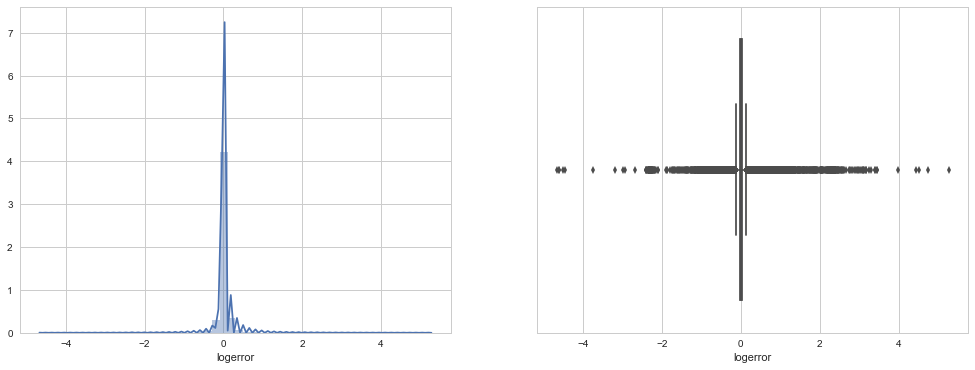

    index   logerror
0   count     167888
6    mean  0.0139063
7     std   0.165706
8     min   -4.65542
9     25%    -0.0253
10    50%      0.006
11    75%     0.0392
12    max      5.263
13  dtype    float64


In [19]:
plt.figure(figsize=(17,6))

plt.subplot(121)
sns.distplot(merged["logerror"])

plt.subplot(122)
sns.boxplot(merged["logerror"])
plt.show()

print(merged_des.loc["logerror"].reset_index().loc[[0, 6, 7, 8, 9, 10, 11, 12, 13],:])

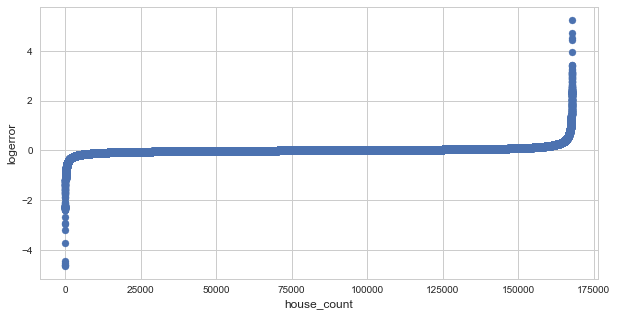

In [20]:
# logerror를 작은 값부터 정렬하여 분포를 살핌
plt.figure(figsize=(10,5))
plt.scatter(range(merged.shape[0]), np.sort(merged["logerror"]))
plt.xlabel('house_count', fontsize=12)
plt.ylabel('logerror', fontsize=12)
plt.show()

##### Comment:
- logerror의 평균은 약 0.01로 zestimation의 logerror는 평균적으로 0에 가깝다 (집값 예측이 대체로 잘 되고 있음)
- 대부분의 값들이 평균인 0 근처에 모여있고, 정규분포와 비슷한 형태를 보이지만 logerror가 상대적으로 아주 큰 outliers들 존재
- logerror는 평균인 0 근처를 기준으로 음수와 양수 양방향으로 분포하고 있음
- 가격을 아주 낮게 예측하거나 높게 예측하는 일부분의 outlier 집들이 logerror를 낮추는 key일수도 있을까?

### 2.3 Exploring Feature Variables

#### 2.3.1 변수별 missing value ratio

In [21]:
merged_des["missing_ratio"] = 1-(merged_des["count"]/merged.shape[0])
merged_missing = pd.DataFrame(merged_des["missing_ratio"].sort_values(ascending=False))
merged_missing.reset_index()

,index,missing_ratio
0,buildingclasstypeid,0.999815
1,finishedsquarefeet13,0.999553
2,basementsqft,0.999446
3,storytypeid,0.999446
4,yardbuildingsqft26,0.999017
5,fireplaceflag,0.997653
6,architecturalstyletypeid,0.997212
7,typeconstructiontypeid,0.996891
8,finishedsquarefeet6,0.995193
9,decktypeid,0.992424


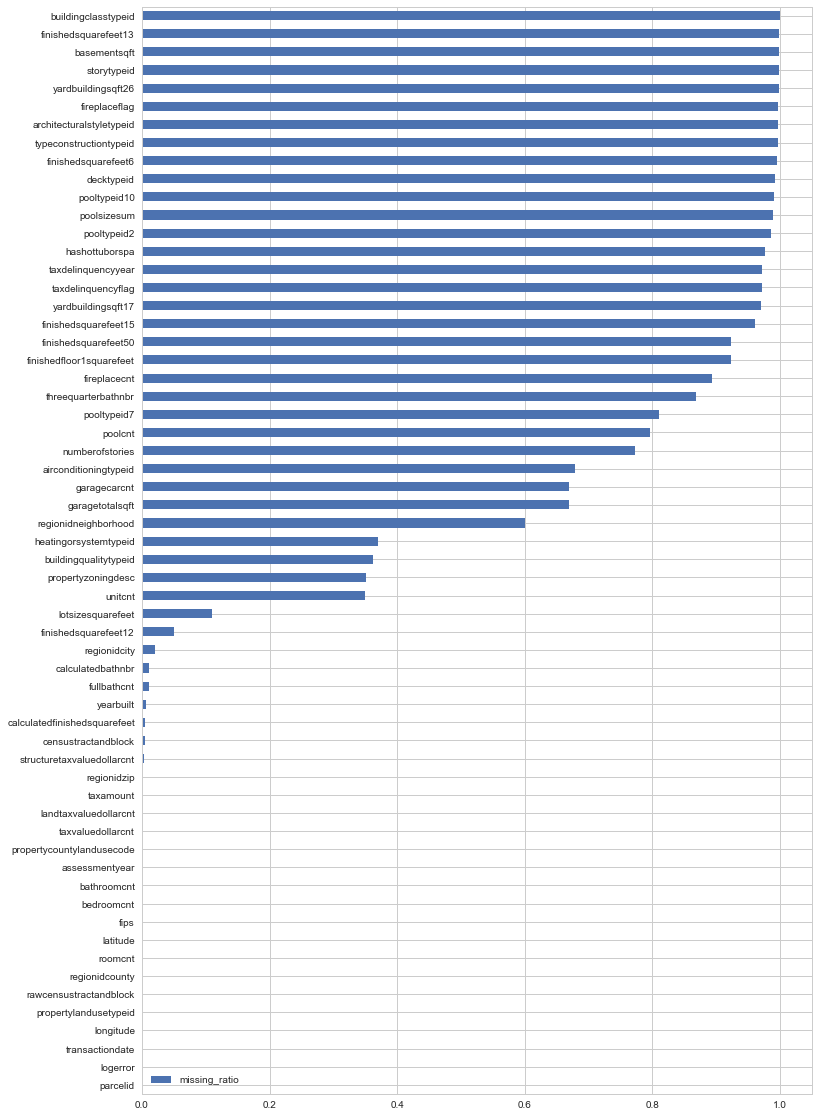

In [22]:
merged_missing.sort_values(by = "missing_ratio", ascending = True).plot(kind = 'barh', figsize=(12,20))

##### Comment:
- missing value ratio가 매우 높은 변수들이 많음
- missing value ratio가 높은 변수들(say, over 75%?)은 이후에 변수들을 주제별로 묶어 살펴보면서, 합리적이고 설득력있는 imputation 방안이 없다고 생각될 경우 변수를 삭제하는 방향으로 가고자 함

- logerror 값이 튀는 outlier들의 분포를 그래프로 그림

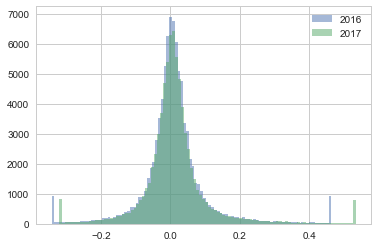

In [25]:
copy16 = merged16.copy()
copy17 = merged17.copy()

ulimit7 = np.percentile(copy17.logerror.values, 99)
llimit7 = np.percentile(copy17.logerror.values, 1)
ulimit6 = np.percentile(copy16.logerror.values, 99)
llimit6 = np.percentile(copy16.logerror.values, 1)

copy17['logerror'].loc[copy17['logerror']>ulimit7] = ulimit7
copy17['logerror'].loc[copy17['logerror']<llimit7] = llimit7
copy16['logerror'].loc[copy16['logerror']>ulimit6] = ulimit6
copy16['logerror'].loc[copy16['logerror']<llimit6] = llimit6

new_x = copy16['logerror']
new_y = copy17['logerror']
plt.hist(new_x, bins=100, alpha=0.5, label='2016')
plt.hist(new_y, bins=100, alpha=0.5, label='2017')
plt.legend(loc='upper right')
plt.show()

#### 2.3.2 주제별 변수 탐색

##### 1) 집의 위치, 지역 등 지리정보와 관련된 변수들
- 전체 리스트: fips, latitude, longitude, rawcensustractandblock, censustractandblock, regionidcounty, regionidcity, regionidzip, regionidneighborhood

##### 2) 건물 특징, 타입 등에 대한 변수들
- 전체 리스트: architecturalstyletypeid, decktypeid, buildingqualitytypeid, buildingclasstypeid, storytypeid, typeconstructiontypeid, propertycountylandusecode, propertylandusetypeid, propertyzoningdesc

##### 3) 집 구조 등에 대한 변수들
- 전체 리스트: bathroomcnt, calculatedbathnbr, threequarterbathnbr, fullbathcnt, numberofstories, roomcnt, basementsqft, bedroomcnt, unitcnt, yearbuilt  (처음에 여기 들어갔던 basementsqft은 면적 관련 변수로 보내겠습니다)

In [26]:
from scipy import stats
import missingno as msno

In [269]:
feet_dict2 = {
    'bathroomcnt':merged.bathroomcnt,
    'calculatedbathnbr':merged.calculatedbathnbr,
    'fullbathcnt':merged.fullbathcnt,
    'threequarterbathnbr':merged.threequarterbathnbr,
    'numberofstories':merged.numberofstories,
    'roomcnt':merged.roomcnt,
    'bedroomcnt':merged.bedroomcnt,
    'unitcnt':merged.unitcnt,
    'yearbuilt':merged.yearbuilt,
}

In [270]:
feet_df2 = pd.DataFrame(feet_dict2)
feet_df2.tail()

,bathroomcnt,calculatedbathnbr,fullbathcnt,threequarterbathnbr,numberofstories,roomcnt,bedroomcnt,unitcnt,yearbuilt
167883,3.0,3.0,3.0,NaN,NaN,0.0,3.0,1.0,1980.0
167884,2.0,2.0,2.0,NaN,NaN,0.0,2.0,1.0,1940.0
167885,2.0,2.0,2.0,NaN,1.0,7.0,4.0,NaN,1964.0
167886,1.0,1.0,1.0,NaN,NaN,0.0,3.0,1.0,1954.0
167887,2.0,2.0,2.0,NaN,NaN,0.0,3.0,1.0,1955.0


In [271]:
feet_df2.shape

(167888, 9)

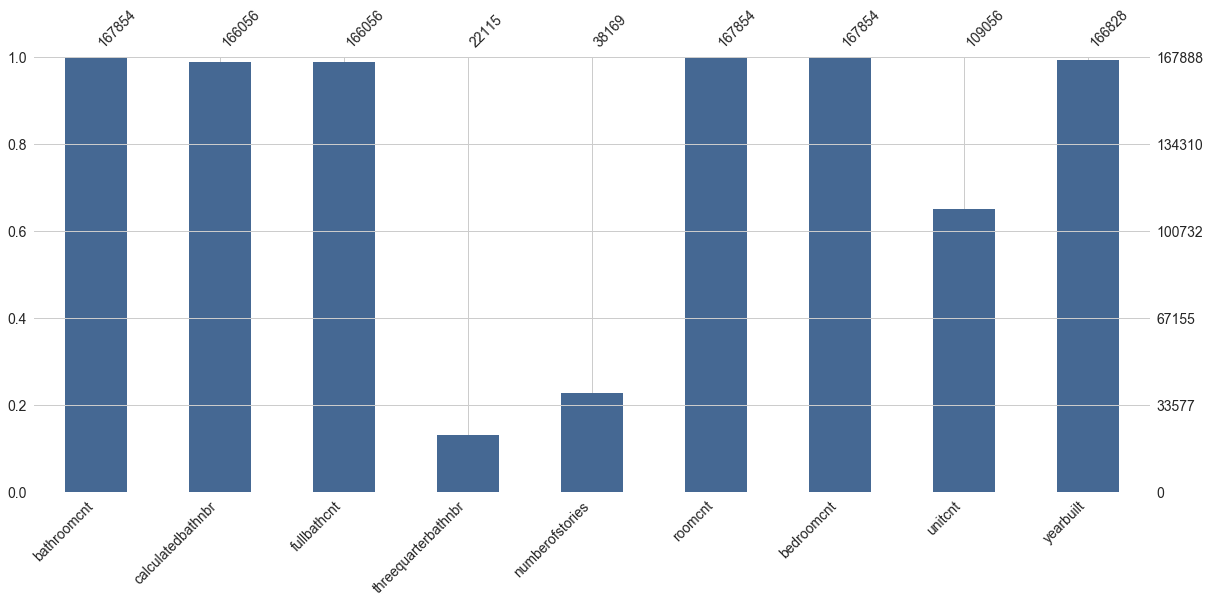

In [272]:
feet_MV_Columns2 = feet_df2.columns[feet_df2.isnull().any()].tolist()
msno.bar(feet_df2[feet_MV_Columns2],\
            figsize=(20,8),color="#456893",fontsize=14,labels=True)
plt.show()

*** bathroomcnt가 calculatedbathnbr, fullbathcnt, threequarterbathnbr를 모두 어우르는 상위 개념, 나머지 Delete**
- (merged에서 아예 삭제해야함)

In [273]:
del feet_dict2["calculatedbathnbr"]
del feet_dict2["fullbathcnt"]
del feet_dict2["threequarterbathnbr"]

In [274]:
feet_df2 = pd.DataFrame(feet_dict2)
feet_df2.tail()

,bathroomcnt,numberofstories,roomcnt,bedroomcnt,unitcnt,yearbuilt
167883,3.0,NaN,0.0,3.0,1.0,1980.0
167884,2.0,NaN,0.0,2.0,1.0,1940.0
167885,2.0,1.0,7.0,4.0,NaN,1964.0
167886,1.0,NaN,0.0,3.0,1.0,1954.0
167887,2.0,NaN,0.0,3.0,1.0,1955.0


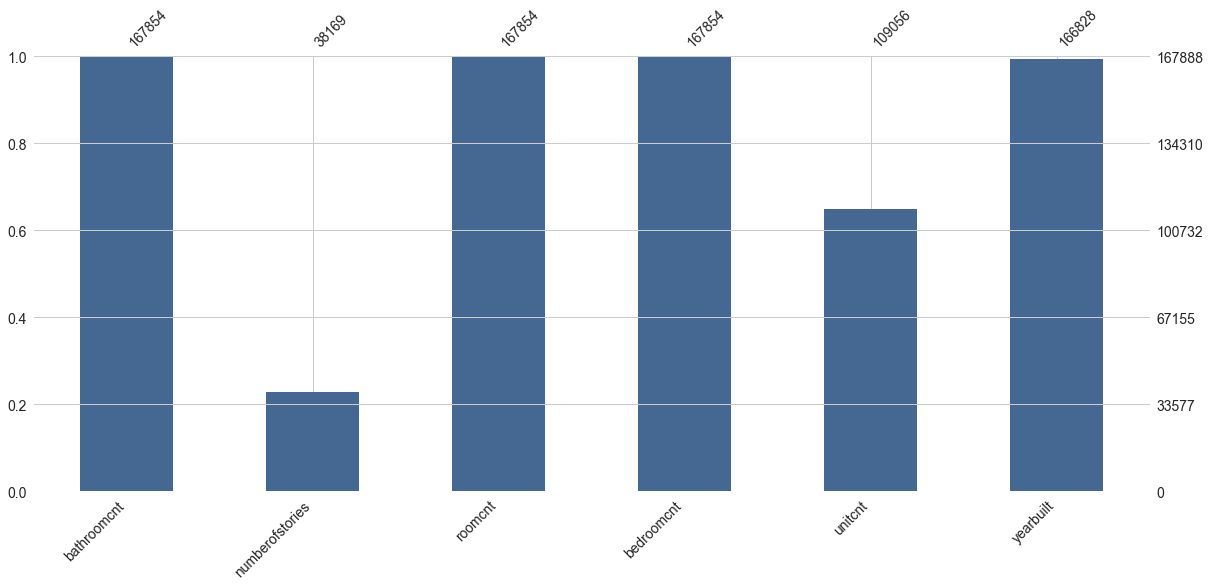

In [275]:
feet_MV_Columns2 = feet_df2.columns[feet_df2.isnull().any()].tolist()
msno.bar(feet_df2[feet_MV_Columns2],\
            figsize=(20,8),color="#456893",fontsize=14,labels=True)
plt.show()

In [276]:
feet_df_desc = feet_df2.describe().transpose()
feet_df_desc["data type"] = feet_df2.dtypes
feet_df_desc["MV ratio"] = round(feet_df2.isnull().sum()/feet_df2.shape[0]*100,3)
feet_df_desc

,count,mean,std,min,25%,50%,75%,max,data type,MV ratio
bathroomcnt,167854.0,2.288265,1.000835,0.0,2.0,2.0,3.0,20.0,float64,0.020
numberofstories,38169.0,1.437764,0.544508,1.0,1.0,1.0,2.0,6.0,float64,77.265
roomcnt,167854.0,1.477480,2.821496,0.0,0.0,0.0,0.0,18.0,float64,0.020
bedroomcnt,167854.0,3.041739,1.149134,0.0,2.0,3.0,4.0,16.0,float64,0.020
unitcnt,109056.0,1.110365,0.988168,1.0,1.0,1.0,1.0,237.0,float64,35.042
yearbuilt,166828.0,1968.569311,23.777202,1824.0,1953.0,1970.0,1987.0,2016.0,float64,0.631


### * Numberofstories

In [277]:
print("numberofstories missing ratio is", str(1-round(merged['numberofstories'].notnull().mean(), 2)))

numberofstories missing ratio is 0.77


In [278]:
df_numberofstories = pd.DataFrame(merged['numberofstories'].value_counts())
df_numberofstories

,numberofstories
1.0,22413
2.0,14808
3.0,945
4.0,2
6.0,1


In [279]:
feet_df_desc.loc['numberofstories'].reset_index()

,index,numberofstories
0,count,38169
1,mean,1.43776
2,std,0.544508
3,min,1
4,25%,1
5,50%,1
6,75%,2
7,max,6
8,data type,float64
9,MV ratio,77.265


In [280]:
df_numberofstories = pd.DataFrame(merged['numberofstories'].value_counts())
df_numberofstories

,numberofstories
1.0,22413
2.0,14808
3.0,945
4.0,2
6.0,1


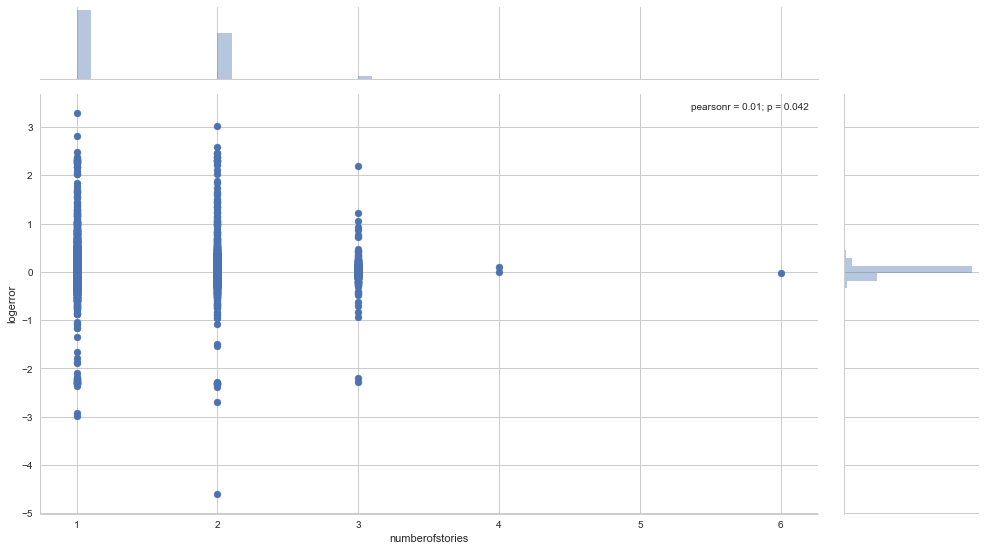

In [281]:
numberofstories_plot = sns.jointplot(x = "numberofstories", y = "logerror", data=merged, kind="scatter")
numberofstories_plot.fig.set_size_inches(15,8)

*** 아웃라이어들(혹은 하이 레버리지)이 보인다. 저것들을 어떻게 컨트롤 하느냐가 관건 **
- Nan값이 무려 77%, 평균(1)로 처리하느냐, 빼느냐 중 하나일듯
- 놔두면 선형회귀모형을 해칠 가능성이 있음..

> 1안 : 최빈값인 1로 넣겠다

> 2안 : 코딩 자체를 변수 조작 카테고리로 1층 / 2층 / 3층 이상

NaN값을 최빈값인 1로 넣어보자

### * Roomcnt

In [282]:
print("roomcnt missing ratio is", str(round(1-(merged['roomcnt'].notnull().mean()), 4)))

roomcnt missing ratio is 0.0002


In [283]:
df_roomcnt = pd.DataFrame(merged['roomcnt'].value_counts().sort_index())
df_roomcnt

,roomcnt
0.0,129666
1.0,4
2.0,25
3.0,483
4.0,3096
5.0,6509
6.0,9876
7.0,8332
8.0,6285
9.0,2552


In [284]:
feet_df_desc.loc['roomcnt'].reset_index()

,index,roomcnt
0,count,167854
1,mean,1.47748
2,std,2.8215
3,min,0
4,25%,0
5,50%,0
6,75%,0
7,max,18
8,data type,float64
9,MV ratio,0.02


In [285]:
df_roomcnt = pd.DataFrame(merged['roomcnt'].value_counts().sort_index())
df_roomcnt

,roomcnt
0.0,129666
1.0,4
2.0,25
3.0,483
4.0,3096
5.0,6509
6.0,9876
7.0,8332
8.0,6285
9.0,2552


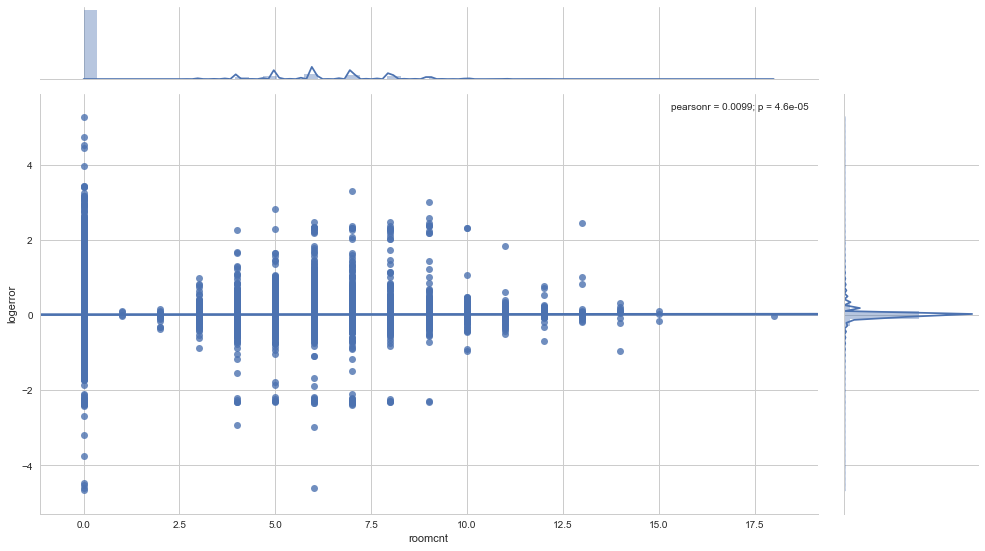

In [286]:
roomcnt_plot = sns.jointplot(x = "roomcnt", y = "logerror", data=merged, kind="reg")
roomcnt_plot.fig.set_size_inches(15,8)

*** bedroomcnt와 counts가 같음. 이상하게 0개에 몰빵, 1~3개가 적음. 완벽한 변수라고 생각할 수 없음**
- 둘 간의 상관관계도 적음
- OLS로 roomcnt, bedroomcnt 한 번 돌려보고 싶음..

> VIF 지수 활용해서 의존성 높은놈을 빼자

### * Bedroomncnt

In [287]:
print("bedroomcnt missing ratio is", str(round(1-(merged['bedroomcnt'].notnull().mean()), 4)))

bedroomcnt missing ratio is 0.0002


In [288]:
df_bedroomcnt = pd.DataFrame(merged['bedroomcnt'].value_counts().sort_index())
df_bedroomcnt

,bedroomcnt
0.0,2258
1.0,7288
2.0,41580
3.0,65883
4.0,37830
5.0,9627
6.0,2120
7.0,442
8.0,527
9.0,161


In [289]:
feet_df_desc.loc['bedroomcnt'].reset_index()

,index,bedroomcnt
0,count,167854
1,mean,3.04174
2,std,1.14913
3,min,0
4,25%,2
5,50%,3
6,75%,4
7,max,16
8,data type,float64
9,MV ratio,0.02


In [290]:
df_bedroomcnt = pd.DataFrame(merged['bedroomcnt'].value_counts().sort_index())
df_bedroomcnt

,bedroomcnt
0.0,2258
1.0,7288
2.0,41580
3.0,65883
4.0,37830
5.0,9627
6.0,2120
7.0,442
8.0,527
9.0,161


In [291]:
df_rooms = pd.concat([feet_df_desc.loc['roomcnt'], feet_df_desc.loc['bedroomcnt']], axis=1)
df_rooms

,roomcnt,bedroomcnt
count,167854,167854
mean,1.47748,3.04174
std,2.8215,1.14913
min,0,0
25%,0,2
50%,0,3
75%,0,4
max,18,16
data type,float64,float64
MV ratio,0.02,0.02


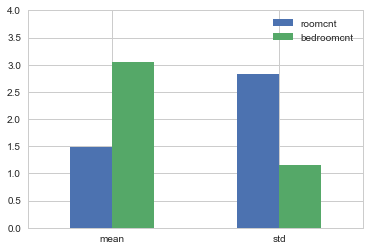

In [292]:
df_rooms[1:3].plot.bar(rot=0)
plt.ylim(0, 4)
plt.show()

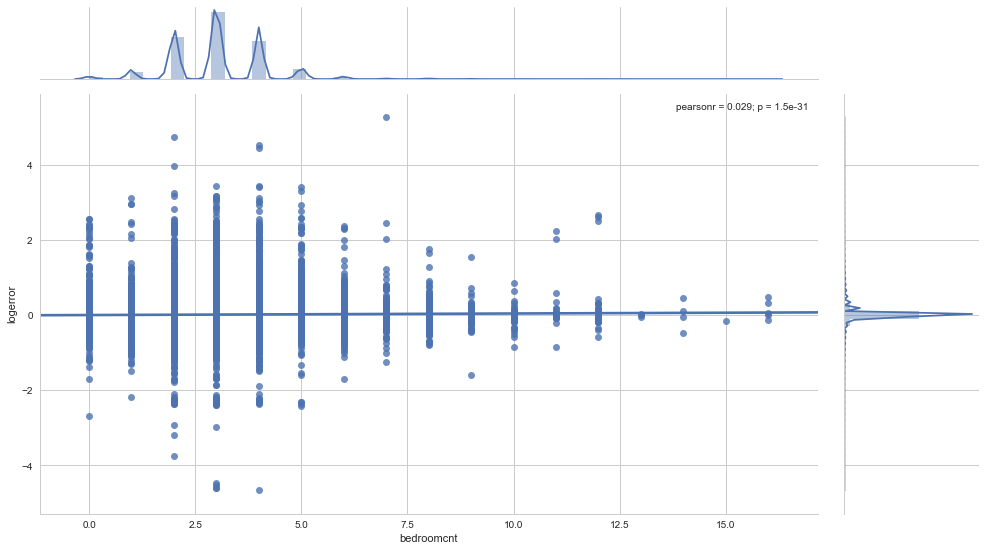

In [293]:
bedroomcnt_plot = sns.jointplot(x = "bedroomcnt", y = "logerror", data=merged, kind="reg")
bedroomcnt_plot.fig.set_size_inches(15,8)

*** NaN값이 거의 없음**

### * Unitcnt

In [294]:
print("unitcnt missing ratio is", str(round(1-(merged['unitcnt'].notnull().mean()), 4)))

unitcnt missing ratio is 0.3504


In [295]:
df_unitcnt = pd.DataFrame(merged['unitcnt'].value_counts().sort_index())
df_unitcnt

,unitcnt
1.0,101916
2.0,4385
3.0,1148
4.0,1597
5.0,1
6.0,2
9.0,1
11.0,1
42.0,1
45.0,1


In [296]:
feet_df_desc.loc['unitcnt'].reset_index()

,index,unitcnt
0,count,109056
1,mean,1.11037
2,std,0.988168
3,min,1
4,25%,1
5,50%,1
6,75%,1
7,max,237
8,data type,float64
9,MV ratio,35.042


In [297]:
df_unitcnt = pd.DataFrame(merged['unitcnt'].value_counts().sort_index())
df_unitcnt

,unitcnt
1.0,101916
2.0,4385
3.0,1148
4.0,1597
5.0,1
6.0,2
9.0,1
11.0,1
42.0,1
45.0,1


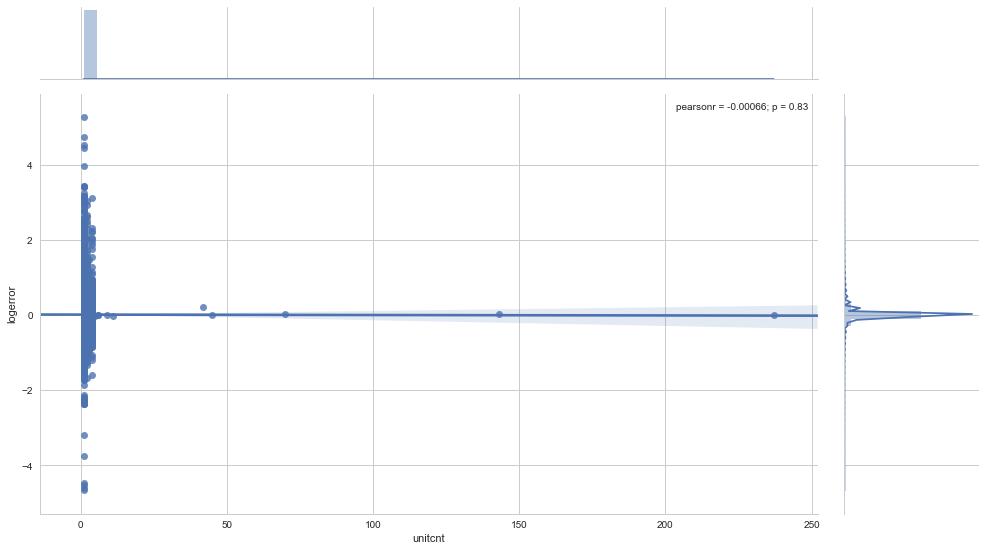

In [298]:
unitcnt_plot = sns.jointplot(x = "unitcnt", y = "logerror", data=merged, kind="reg")
unitcnt_plot.fig.set_size_inches(15,8)

*** NaN값이 다소 있음. 어떻게 처리해줄까가 관건**
- Mean값으로 처리하는 것을 추천

> NaN 데이터를 1로 통일

### * Yearbuilt

In [299]:
print("yearbuilt missing ratio is", str(round(1-(merged['yearbuilt'].notnull().mean()), 4)))

yearbuilt missing ratio is 0.0063


In [301]:
df_yearbuilt = pd.DataFrame(merged['yearbuilt'].value_counts().sort_index())
df_yearbuilt

,yearbuilt
1824.0,1
1866.0,1
1878.0,1
1880.0,1
1882.0,1
1883.0,1
1885.0,12
1886.0,1
1887.0,4
1888.0,6


In [302]:
feet_df_desc.loc['yearbuilt'].reset_index()

,index,yearbuilt
0,count,166828
1,mean,1968.57
2,std,23.7772
3,min,1824
4,25%,1953
5,50%,1970
6,75%,1987
7,max,2016
8,data type,float64
9,MV ratio,0.631


In [303]:
df_yearbuilt = pd.DataFrame(merged['yearbuilt'].value_counts().sort_index())
df_yearbuilt

,yearbuilt
1824.0,1
1866.0,1
1878.0,1
1880.0,1
1882.0,1
1883.0,1
1885.0,12
1886.0,1
1887.0,4
1888.0,6


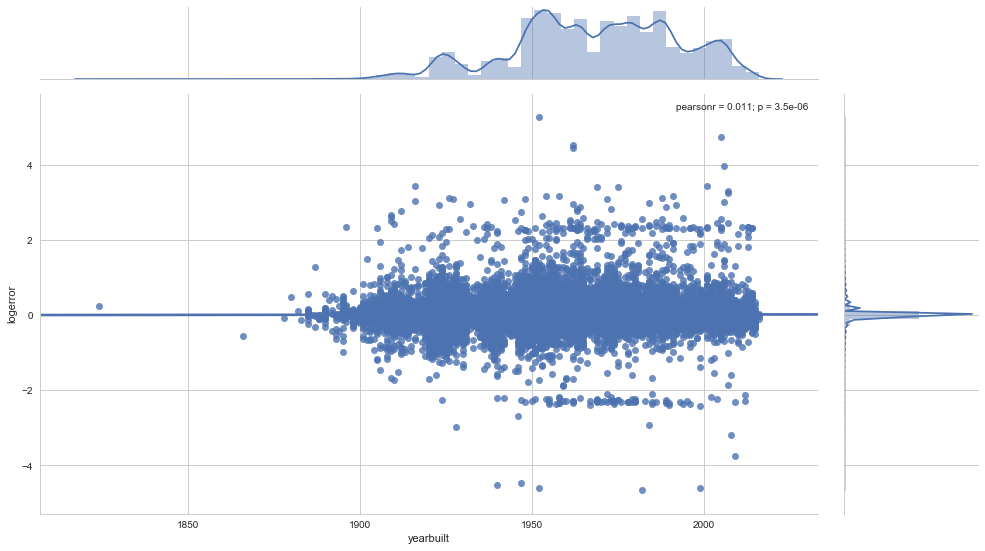

In [304]:
yearbuilt_plot = sns.jointplot(x = "yearbuilt", y = "logerror", data=merged, kind="reg")
yearbuilt_plot.fig.set_size_inches(15,8)

*** 의외로 오래된 집들이 logerror값이 크게 튀지는 않는듯 **
- 회귀모형을 세게 건드리지 않을 것 같음.
- NaN값이 없으므로 바로 작업 ㄱㄱ

##### 4) 집의 기타 특징(유틸리티 등)에 대한 변수들
- 전체 리스트: heatingorsystemtypeid, airconditioningtypeid, hashottuborspa, fireplacecnt, fireplaceflag, poolcnt, poolsizesum, pooltypeid10, pooltypeid2, pooltypeid7

In [305]:
feet_dict3 = {
    'heatingorsystemtypeid':merged.heatingorsystemtypeid,
    'airconditioningtypeid':merged.airconditioningtypeid,
    'hashottuborspa':merged.hashottuborspa,
    'fireplacecnt':merged.fireplacecnt,
    'fireplaceflag':merged.fireplaceflag,
    'poolcnt':merged.poolcnt,
    'poolsizesum':merged.poolsizesum,
    'pooltypeid10':merged.pooltypeid10,
    'pooltypeid2':merged.pooltypeid2,
    'pooltypeid7':merged.pooltypeid7,
}

In [306]:
feet_df3 = pd.DataFrame(feet_dict3)
feet_df3.tail()

,heatingorsystemtypeid,airconditioningtypeid,hashottuborspa,fireplacecnt,fireplaceflag,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7
167883,2.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0
167884,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167885,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
167886,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167887,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [307]:
feet_df3.shape

(167888, 10)

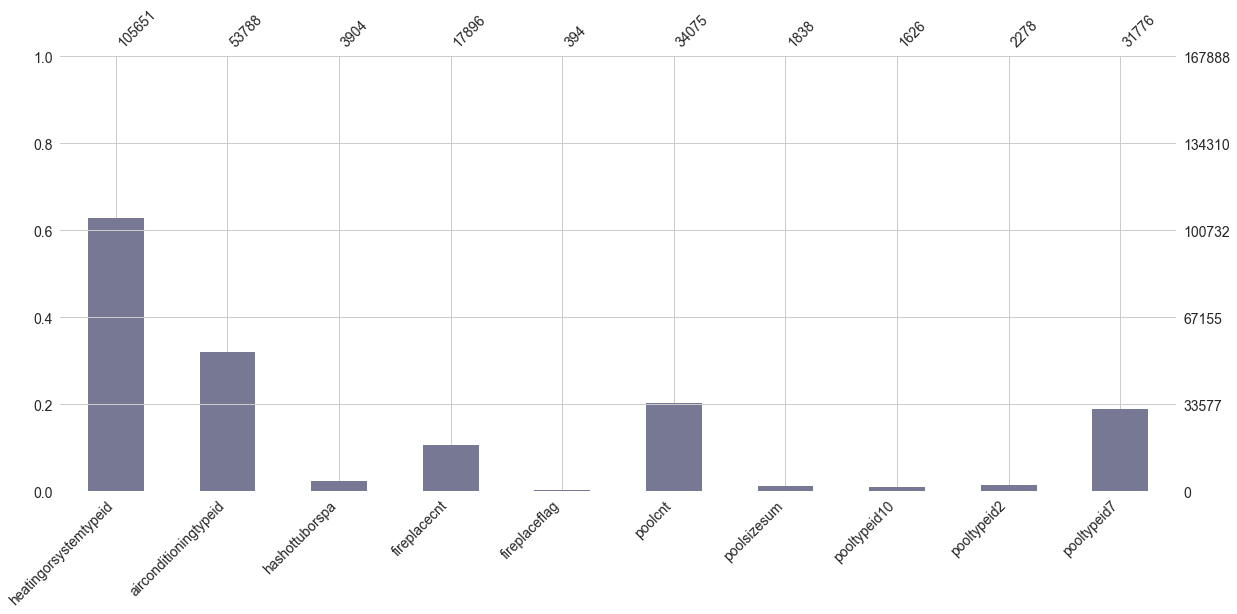

In [308]:
feet_MV_Columns3 = feet_df3.columns[feet_df3.isnull().any()].tolist()
msno.bar(feet_df3[feet_MV_Columns3],\
            figsize=(20,8),color="#777893",fontsize=14,labels=True)
plt.show()

*** hashottuborspa, fireplaceflag, poolsizesum, pooltypeid10, pooltypeid2 삭제**
- 

In [309]:
del feet_dict3["hashottuborspa"]
del feet_dict3["fireplaceflag"]
del feet_dict3["poolsizesum"]
del feet_dict3["pooltypeid10"]
del feet_dict3["pooltypeid2"]

In [310]:
feet_df3 = pd.DataFrame(feet_dict3)
feet_df3.tail()

,heatingorsystemtypeid,airconditioningtypeid,fireplacecnt,poolcnt,pooltypeid7
167883,2.0,1.0,NaN,1.0,1.0
167884,2.0,NaN,NaN,NaN,NaN
167885,NaN,NaN,1.0,NaN,NaN
167886,2.0,1.0,NaN,NaN,NaN
167887,2.0,NaN,NaN,NaN,NaN


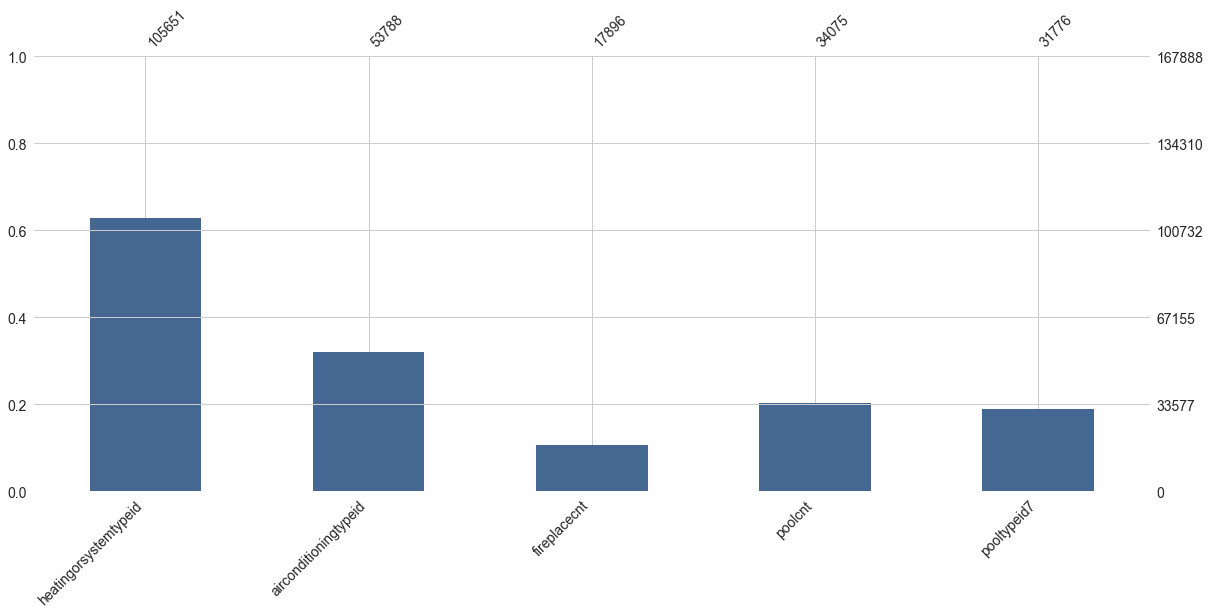

In [311]:
feet_MV_Columns3 = feet_df3.columns[feet_df3.isnull().any()].tolist()
msno.bar(feet_df3[feet_MV_Columns3],\
            figsize=(20,8),color="#456893",fontsize=14,labels=True)
plt.show()

In [312]:
feet_df_desc = feet_df3.describe().transpose()
feet_df_desc["data type"] = feet_df3.dtypes
feet_df_desc["MV ratio"] = round(feet_df3.isnull().sum()/feet_df3.shape[0]*100,3)
feet_df_desc

,count,mean,std,min,25%,50%,75%,max,data type,MV ratio
heatingorsystemtypeid,105651.0,3.924525,3.642599,1.0,2.0,2.0,7.0,24.0,float64,37.071
airconditioningtypeid,53788.0,1.814345,2.970239,1.0,1.0,1.0,1.0,13.0,float64,67.962
fireplacecnt,17896.0,1.189428,0.487327,1.0,1.0,1.0,1.0,5.0,float64,89.341
poolcnt,34075.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0,float64,79.704
pooltypeid7,31776.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0,float64,81.073


### * heatingorsystemtypeid (Category)

In [313]:
print("heatingorsystemtypeid missing ratio is", str(round(1-(merged['heatingorsystemtypeid'].notnull().mean()), 4)))

heatingorsystemtypeid missing ratio is 0.3707


In [314]:
df_heatingorsystemtypeid = pd.DataFrame(merged['heatingorsystemtypeid'].value_counts().sort_index())
df_heatingorsystemtypeid

,heatingorsystemtypeid
1.0,26
2.0,71936
6.0,1747
7.0,29626
10.0,5
11.0,2
12.0,1
13.0,136
14.0,2
18.0,48


In [315]:
feet_df_desc.loc['heatingorsystemtypeid']

count         105651
mean         3.92453
std           3.6426
min                1
25%                2
50%                2
75%                7
max               24
data type    float64
MV ratio      37.071
Name: heatingorsystemtypeid, dtype: object

In [316]:
df_heatingorsystemtypeid = pd.DataFrame(merged['heatingorsystemtypeid'].value_counts().sort_index()).transpose()
df_heatingorsystemtypeid

,1.0,2.0,6.0,7.0,10.0,11.0,12.0,13.0,14.0,18.0,20.0,24.0
heatingorsystemtypeid,26,71936,1747,29626,5,2,1,136,2,48,201,1921


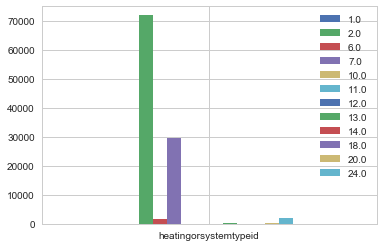

In [317]:
df_heatingorsystemtypeid[:5].plot.bar(rot=0)
plt.ylim(0, 75000)
plt.show()

- 2 : Central
- 7 : Floor/Wall
- 13 : None
- 24 : Yes

**NaN을 처리하기가 애매함..**

> 1. Yes or No 로 처리할지

> 2. 최빈값으로 처리할지

> 나중에 결과 따로 한번 돌려보고 잘 나오는 결과로 쓰기!

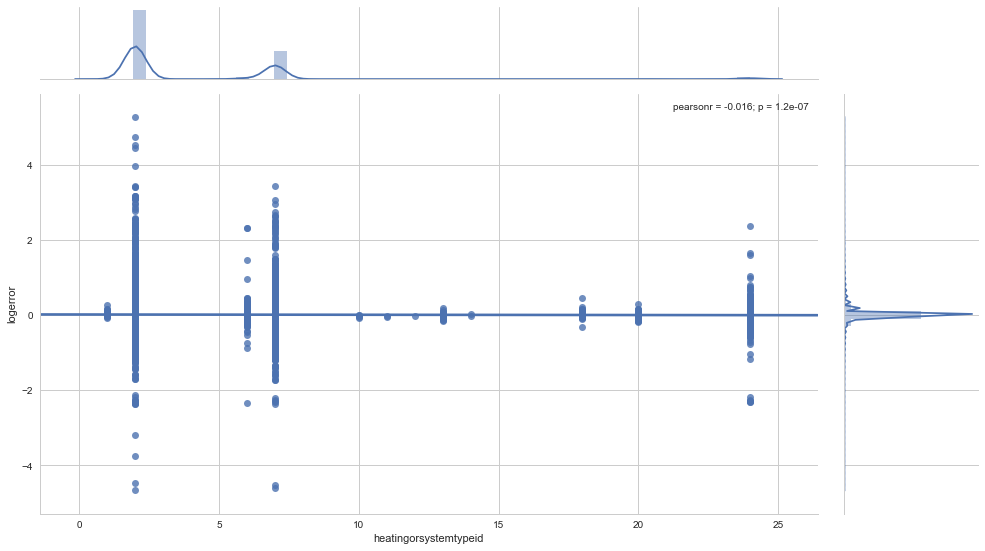

In [318]:
heatingorsystemtypeid_plot = sns.jointplot(x = "heatingorsystemtypeid", y = "logerror", data=merged, kind="reg")
heatingorsystemtypeid_plot.fig.set_size_inches(15,8)

### * airconditioningtypeid (Category)

In [319]:
print("airconditioningtypeid missing ratio is", str(round(1-(merged['airconditioningtypeid'].notnull().mean()), 4)))

airconditioningtypeid missing ratio is 0.6796


In [320]:
df_airconditioningtypeid = pd.DataFrame(merged['airconditioningtypeid'].value_counts().sort_index())
df_airconditioningtypeid

,airconditioningtypeid
1.0,49854
3.0,1
5.0,382
9.0,27
11.0,116
13.0,3408


In [321]:
feet_df_desc.loc['airconditioningtypeid']

count          53788
mean         1.81435
std          2.97024
min                1
25%                1
50%                1
75%                1
max               13
data type    float64
MV ratio      67.962
Name: airconditioningtypeid, dtype: object

In [322]:
df_airconditioningtypeid = pd.DataFrame(merged['airconditioningtypeid'].value_counts().sort_index()).transpose()
df_airconditioningtypeid

,1.0,3.0,5.0,9.0,11.0,13.0
airconditioningtypeid,49854,1,382,27,116,3408


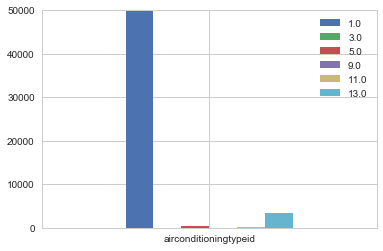

In [323]:
df_airconditioningtypeid[:5].plot.bar(rot=0)
plt.ylim(0, 50000)
plt.show()

**- MV Ratio도 높은데 카테고리도 헷갈림**
- 1 : Central
- 5 : None
- 11 : Wall unit
- 13 : Yes

*** 보통 미국은 에어컨이 보편화 되어있다. NaN이 없다! 라고 하기엔 63%나 없을리는 없다.**

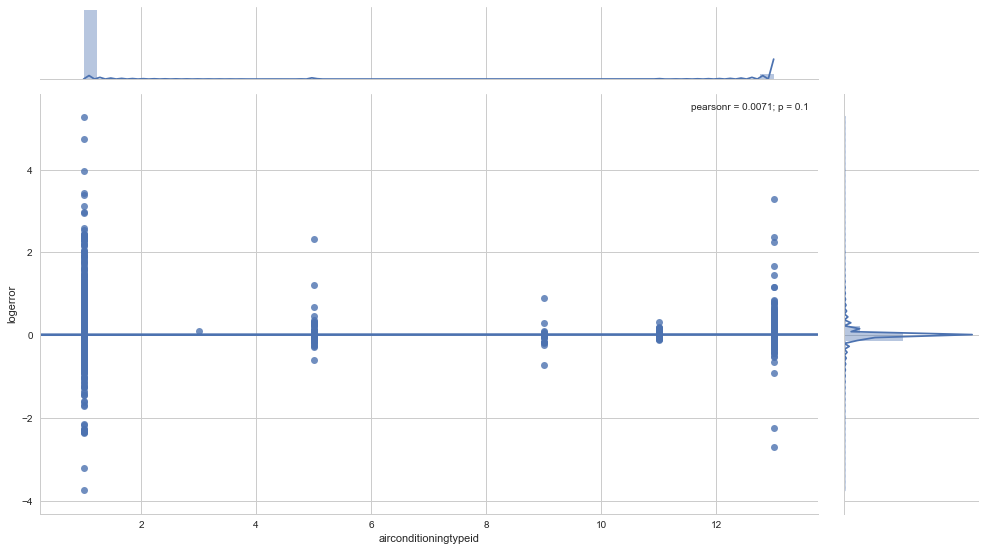

In [324]:
airconditioningtypeid_plot = sns.jointplot(x = "airconditioningtypeid", y = "logerror", data=merged, kind="reg")
airconditioningtypeid_plot.fig.set_size_inches(15,8)

### * fireplacecnt

In [325]:
print("fireplacecnt missing ratio is", str(round(1-(merged['fireplacecnt'].notnull().mean()), 4)))

fireplacecnt missing ratio is 0.8934


In [326]:
df_fireplacecnt = pd.DataFrame(merged['fireplacecnt'].value_counts().sort_index())
df_fireplacecnt

,fireplacecnt
1.0,15183
2.0,2104
3.0,547
4.0,56
5.0,6


In [327]:
feet_df_desc.loc['fireplacecnt']

count           17896
mean          1.18943
std          0.487327
min                 1
25%                 1
50%                 1
75%                 1
max                 5
data type     float64
MV ratio       89.341
Name: fireplacecnt, dtype: object

In [328]:
df_fireplacecnt = pd.DataFrame(merged['fireplacecnt'].value_counts().sort_index()).transpose()
df_fireplacecnt

,1.0,2.0,3.0,4.0,5.0
fireplacecnt,15183,2104,547,56,6


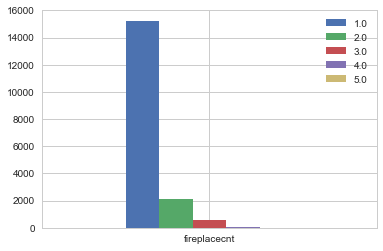

In [329]:
df_fireplacecnt[:5].plot.bar(rot=0)
plt.ylim(0, 16000)
plt.show()

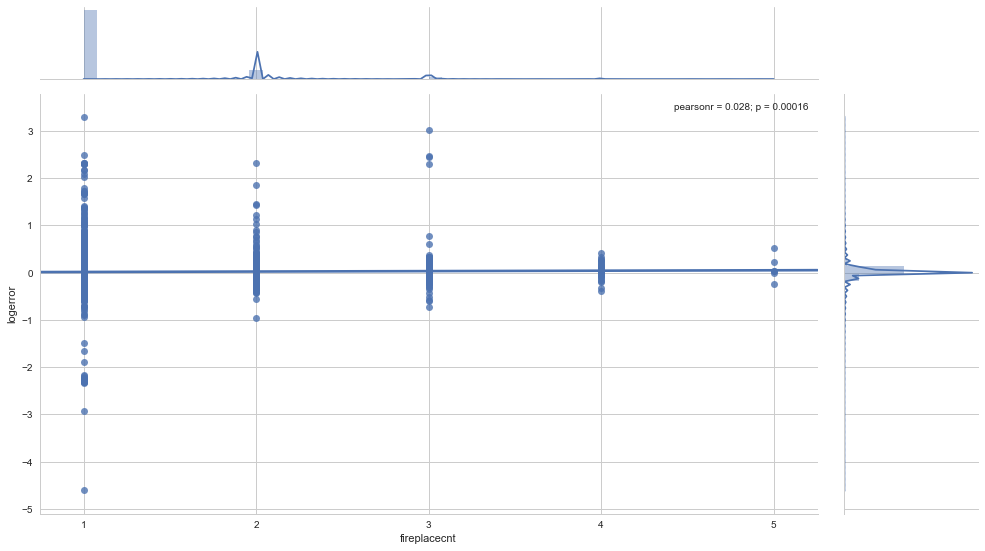

In [330]:
fireplacecnt_plot = sns.jointplot(x = "fireplacecnt", y = "logerror", data=merged, kind="reg")
fireplacecnt_plot.fig.set_size_inches(15,8)

### * poolcnt

In [331]:
print("poolcnt missing ratio is", str(round(1-(merged['poolcnt'].notnull().mean()), 4)))

poolcnt missing ratio is 0.797


In [332]:
df_poolcnt = pd.DataFrame(merged['poolcnt'].value_counts().sort_index())
df_poolcnt

,poolcnt
1.0,34075


In [333]:
feet_df_desc.loc['poolcnt']

count          34075
mean               1
std                0
min                1
25%                1
50%                1
75%                1
max                1
data type    float64
MV ratio      79.704
Name: poolcnt, dtype: object

In [334]:
df_poolcnt = pd.DataFrame(merged['poolcnt'].value_counts().sort_index())
df_poolcnt

,poolcnt
1.0,34075


*** Pool은 있고/없고로 나뉘는 것이 가장 적합하다. 없으면 0으로 채우는것이 현명.**

### pooltypeid7

*** MV Ratio가 적어서 넣긴 했는데...**

- pooltypeid2(Pool with Spa/Hot Tub)
- pooltypeid7(Pool without hot tub)
- pooltypeid10(Spa or Hot Tub)는

`poolcnt`에 모두 포함되는 개념으로 보인다.
- 그러므로 독립변수에 추가하지는 않는 것으로 유도한다.

In [335]:
df_pool = pd.DataFrame(columns=["poolcnt","pooltypeid2+7"])
df_pool["poolcnt"] = merged["poolcnt"].value_counts()
df_pool["pooltypeid2+7"] = merged["pooltypeid2"].value_counts() + merged["pooltypeid7"].value_counts()
df_pool

,poolcnt,pooltypeid2+7
1.0,34075,34054


In [336]:
merged["pooltypeid10"].value_counts()

1.0    1626
Name: pooltypeid10, dtype: int64

##### 5) 집의 면적에 대한 변수들
- 전체 리스트: basementsqft, finishedfloor1squarefeet, calculatedfinishedsquarefeet, finishedsquarefeet6, finishedsquarefeet12, finishedsquarefeet13, finishedsquarefeet15, finishedsquarefeet50, yardbuildingsqft17, yardbuildingsqft26, garagecarcnt, garagetotalsqft, lotsizesquarefeet

##### 6) tax와 관련된 변수들
- 전체리스트: taxvaluedollarcnt, structuretaxvaluecollarcnt, landtaxvaluedollarcnt, taxamount, assessmentyear, taxdelinquencyflag, taxdelinquencyyear

### 2.4 Relationship between Logerror and variables

## **3. Feature Engineering**

### 3.1 Missing Values

#### 3.1.1 Join Train and Test Data

#### 3.1.2 Status of missing values

In [229]:
merged["numberofstories"] = merged["numberofstories"].fillna(1)
merged["roomcnt"] = merged["roomcnt"].fillna(1)
merged["bedroomcnt"] = merged["bedroomcnt"].fillna(3)
merged["unitcnt"] = merged["unitcnt"].fillna(1)
merged["heatingorsystemtypeid"] = merged["heatingorsystemtypeid"].fillna(2)
merged["airconditioningtypeid"] = merged["airconditioningtypeid"].fillna(1)
merged["fireplacecnt"] = merged["fireplacecnt"].fillna(0)
merged["poolcnt"] = merged["poolcnt"].fillna(0)

In [230]:
# traing16을 기준으로 prop16을 merge
merged16_new = pd.merge(train16, prop16, on="parcelid", how="left")
merged16_new.tail()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
90270,10774160,-0.0356,2016-12-30,1.0,NaN,NaN,1.0,1.0,NaN,4.0,...,NaN,NaN,43800.0,191000.0,2015.0,147200.0,2495.24,NaN,NaN,6.037132e+13
90271,12046695,0.0070,2016-12-30,NaN,NaN,NaN,3.0,3.0,NaN,4.0,...,NaN,NaN,117893.0,161111.0,2015.0,43218.0,1886.54,NaN,NaN,6.037301e+13
90272,12995401,-0.2679,2016-12-30,NaN,NaN,NaN,2.0,4.0,NaN,7.0,...,NaN,NaN,22008.0,38096.0,2015.0,16088.0,1925.70,Y,14.0,6.037433e+13
90273,11402105,0.0602,2016-12-30,NaN,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,132991.0,165869.0,2015.0,32878.0,2285.57,NaN,NaN,6.037601e+13
90274,12566293,0.4207,2016-12-30,NaN,NaN,NaN,1.0,3.0,NaN,7.0,...,NaN,NaN,66258.0,163037.0,2015.0,96779.0,2560.96,NaN,NaN,6.037544e+13


In [231]:
# traing17을 기준으로 prop17을 merge
merged17_new = pd.merge(train17, prop17, on="parcelid", how="left")
merged17_new.tail()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
77608,10833991,-0.002245,2017-09-20,1.0,NaN,NaN,3.0,3.0,NaN,8.0,...,NaN,NaN,265000.0,379000.0,2016.0,114000.0,4685.34,NaN,NaN,6.037132e+13
77609,11000655,0.020615,2017-09-20,NaN,NaN,NaN,2.0,2.0,NaN,6.0,...,NaN,NaN,70917.0,354621.0,2016.0,283704.0,4478.43,NaN,NaN,6.037101e+13
77610,17239384,0.013209,2017-09-21,NaN,NaN,NaN,2.0,4.0,NaN,NaN,...,1.0,NaN,50683.0,67205.0,2016.0,16522.0,1107.48,NaN,NaN,6.111008e+13
77611,12773139,0.037129,2017-09-21,1.0,NaN,NaN,1.0,3.0,NaN,4.0,...,NaN,NaN,32797.0,49546.0,2016.0,16749.0,876.43,NaN,NaN,6.037434e+13
77612,12826780,0.007204,2017-09-25,NaN,NaN,NaN,2.0,3.0,NaN,6.0,...,NaN,NaN,140000.0,522000.0,2016.0,382000.0,6317.15,NaN,NaN,6.037503e+13


In [232]:
merged_new = pd.concat([merged16, merged17]).reset_index(drop=True)
merged_new.tail()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
167883,10833991,-0.002245,2017-09-20,1.0,NaN,NaN,3.0,3.0,NaN,8.0,...,NaN,NaN,265000.0,379000.0,2016.0,114000.0,4685.34,NaN,NaN,6.037132e+13
167884,11000655,0.020615,2017-09-20,NaN,NaN,NaN,2.0,2.0,NaN,6.0,...,NaN,NaN,70917.0,354621.0,2016.0,283704.0,4478.43,NaN,NaN,6.037101e+13
167885,17239384,0.013209,2017-09-21,NaN,NaN,NaN,2.0,4.0,NaN,NaN,...,1.0,NaN,50683.0,67205.0,2016.0,16522.0,1107.48,NaN,NaN,6.111008e+13
167886,12773139,0.037129,2017-09-21,1.0,NaN,NaN,1.0,3.0,NaN,4.0,...,NaN,NaN,32797.0,49546.0,2016.0,16749.0,876.43,NaN,NaN,6.037434e+13
167887,12826780,0.007204,2017-09-25,NaN,NaN,NaN,2.0,3.0,NaN,6.0,...,NaN,NaN,140000.0,522000.0,2016.0,382000.0,6317.15,NaN,NaN,6.037503e+13


In [233]:
merged_new["heatingorsystemtypeid"]

0         2.0
1         NaN
2         2.0
3         2.0
4         NaN
5         2.0
6         7.0
7         NaN
8         NaN
9         NaN
10        2.0
11        2.0
12        7.0
13        NaN
14        NaN
15        6.0
16        NaN
17        2.0
18        NaN
19        2.0
20        7.0
21        NaN
22        NaN
23        2.0
24        NaN
25        2.0
26        2.0
27        6.0
28        2.0
29        2.0
         ... 
167858    7.0
167859    7.0
167860    2.0
167861    7.0
167862    2.0
167863    7.0
167864    7.0
167865    2.0
167866    2.0
167867    2.0
167868    2.0
167869    7.0
167870    2.0
167871    7.0
167872    NaN
167873    2.0
167874    2.0
167875    7.0
167876    2.0
167877    NaN
167878    2.0
167879    2.0
167880    2.0
167881    2.0
167882    2.0
167883    2.0
167884    2.0
167885    NaN
167886    2.0
167887    2.0
Name: heatingorsystemtypeid, Length: 167888, dtype: float64

In [244]:
df = pd.DataFrame(columns=["Original","Yes","None"])
df["Original"] = merged_new["heatingorsystemtypeid"]
df

,Original,Yes,None
0,2.0,NaN,NaN
1,NaN,NaN,NaN
2,2.0,NaN,NaN
3,2.0,NaN,NaN
4,NaN,NaN,NaN
5,2.0,NaN,NaN
6,7.0,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN


In [252]:
df["None"] = df[df["Original"] == 13.0]["Original"]
df2 = df[df["None"] == 13.0]
df2

,Original,Yes,None
478,13.0,NaN,13.0
929,13.0,NaN,13.0
1927,13.0,NaN,13.0
2588,13.0,NaN,13.0
2989,13.0,NaN,13.0
6554,13.0,NaN,13.0
6977,13.0,NaN,13.0
7269,13.0,NaN,13.0
8112,13.0,NaN,13.0
10171,13.0,NaN,13.0


In [227]:
df2 = df[df["Original"] == 13]
df2

,Original,Yes,None


In [208]:
df.columns[2]

'None'

In [218]:
df2 = df[np.isnan(df["Original"])]
df2["None"] = 1.0
df2

,Original,Yes,None
1,NaN,NaN,1.0
4,NaN,NaN,1.0
7,NaN,NaN,1.0
8,NaN,NaN,1.0
9,NaN,NaN,1.0
13,NaN,NaN,1.0
14,NaN,NaN,1.0
16,NaN,NaN,1.0
18,NaN,NaN,1.0
21,NaN,NaN,1.0


 #### 3.1.3 Missing Values processing

### 3.2 Feature Correlation

#### 3.2.1 Numerical Features

#### 3.2.2 Categorical Features

### 3.3 Determination of outliers and variables using OLS model

#### 3.3.1 Model by all numerical Features

#### 3.3.2 Model by all categorical Features

#### 3.3.3 Model by numerical and categorical features together

#### 3.3.4 Model by high correlation coefficient numerical features with Logerror

#### 3.3.5 Model by high correlation coefficient numerical features and categorical features 

#### 3.3.6 Multi-collinearity and variance analysis between variables

##### (1) Multi-collinearity

##### (2) Analysis of variance on categorical features

#### 3.3.7 Comparison of model performance by using variables

### 3.4 Outlier

#### 1) Option1 : IQR (Interquartile Range)

#### 2) Option2 : Standardized resids

#### 3) Option3 : Cook's Distance

#### 4) Check all outliers (option 1,2,3)

#### 5) Combination of outliers groups

### 3.5 Data preprocessing

#### 3.5.1 Select numerical variables

#### 3.5.2 Select categorical variables

## **4. Modeling**

### 4.1. Input data

### 4.2 OLS(Ordinary Least Square) Model

#### 4.2.1 Make OLS Model

#### 4.2.2 ANOVA F-test

#### 4.2.3 RMSE

#### 4.2.4 Normalization of residuals

### 4.3 Predict Logerror